In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [13]:
train = pd.read_csv(r"/Users/sharvitkashikar/greenAI-Sem7/day-10/RNN/DailyDelhiClimateTest/DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
test = pd.read_csv(r"/Users/sharvitkashikar/greenAI-Sem7/day-10/RNN/DailyDelhiClimateTest/DailyDelhiClimateTest.csv")

In [14]:

train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
#perform head tail describe and preprocessing steps on this dataset
train.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [19]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [20]:

train.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [21]:
train['day'] = train.index.day
train['month'] = train.index.month

In [22]:
# Converting date to datetime format
test['date'] = pd.to_datetime(test['date'])
# Set date as index
test.set_index('date', inplace=True)
# Extract day and month features
test['day'] = test.index.day
test['month'] = test.index.month

In [23]:
train.head()
test.head()

,meantemp,humidity,wind_speed,meanpressure,day,month
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,1
2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,1
2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,1
2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,1


In [24]:
# Concatenate the train and test data
data = pd.concat([train, test], axis=0)
# Since date is already the index, we don't need to drop it again
data.head()

,meantemp,humidity,wind_speed,meanpressure,day,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1


In [25]:
import plotly.graph_objects as go

In [31]:
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x = data.index, y = data['meantemp'], mode='lines', name='Mean Temperature'))

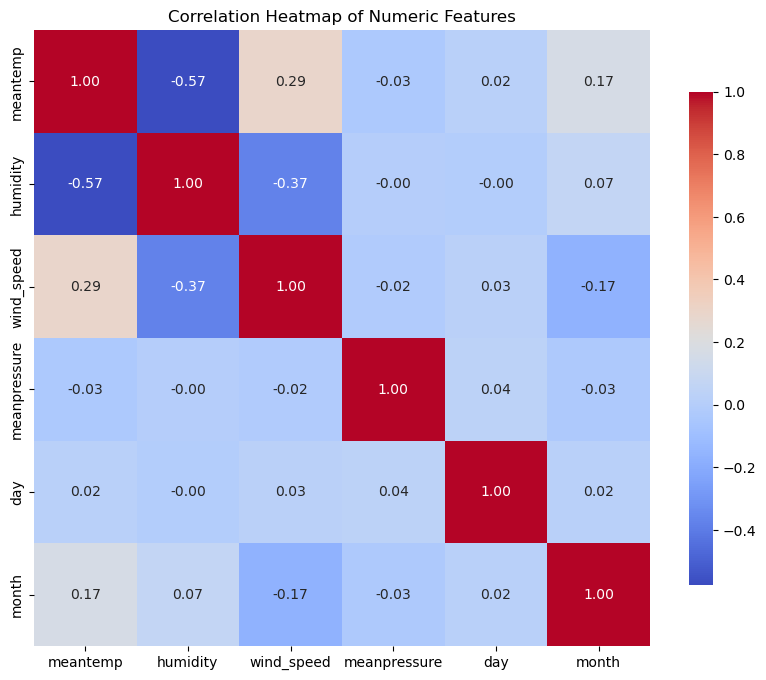

In [38]:
numeric_df = data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Set the figure size
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [39]:
numeric_df = numeric_df.drop(columns=['day', 'month', 'year'], axis=1, errors='ignore')

corr = numeric_df.corr()

<Axes: >

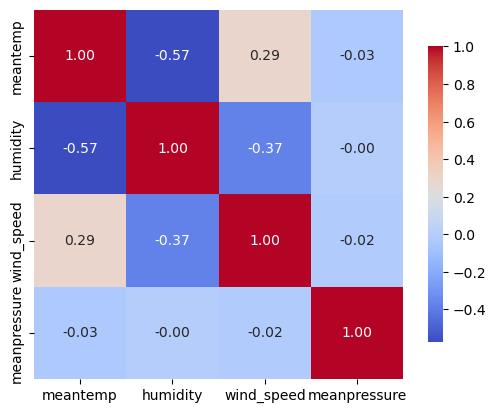

In [40]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})